## Conociendo nuestros datos: palmerpenguis


### Instalar librerias necesarias

In [1]:
# !pip install --upgrade pip
# !pip install palmerpenguins numpy pandas seaborn matplotlib empiricaldist statsmodels sklearn pyjanitor

### Importar librerias

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import palmerpenguins
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

### Establecer apariencia general de los graficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11,9.4)

penguin_color = {
    'Adelie':'#ff6602ff',
    'Gentoo':'#0f7175ff',
    'Chinstrap':'#c65dc9ff',
    'Torgersen': '#955FC8', 
    'Biscoe': '#94e2c3', 
    'Dream': '#345469',
    'female':'pink',
    'male':'skyblue',
    2007:'#ead3c9',        
    2008:'#a86790',        
    2009:'#2e2541',    
}

### Cargar los datos

In [4]:
preprocess_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv') # preprocessed Data

In [5]:
preprocess_penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


## Ejercicio de validación de datos

- Que tipo de datos son las variables del conjunto de datos?
- Cuantas variables de cada tipo de dato tenemos en el conjunto de datos?
- Cuantas observaciones y varibles tenemos en el conjunto de datos?
- Existen valores nulos explicitos en el conjunto de datos?
- De tener observaciones con valores nulos, ?cuantas tenemos por cada variable?
- Cuantos valores nulos tenemos en el total en el conjunto de datos?
- Cual es la proporcion de valores nulos pro cada variable?
- Como podemos visualizar los valores nulos en todo el conjunto de datos?
- Cuantas observaciones perdemos si eliminamos los datos faltantes?

## Analisis Univariado

In [6]:
preprocess_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


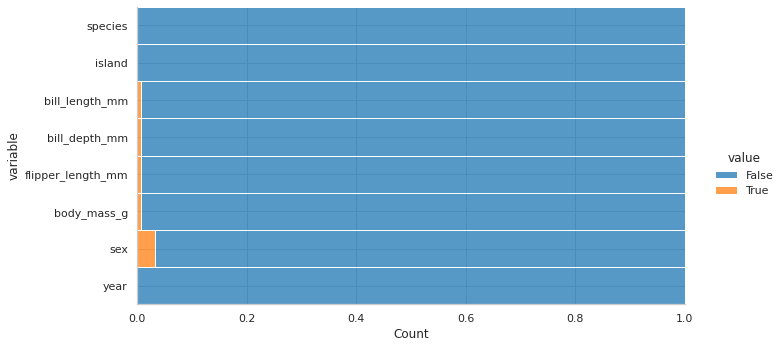

In [7]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2,
            )
            
        )
    )
)

In [8]:
penguins_df = (
    preprocess_penguins_df
    .dropna()
)

penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


### Preludio: Que estadisticos describen el conjunto de datos?
#### Todas las variables
- Solo las numericas
- Solo categorias -1
- Solo categorias -2
#### Como visualizar los contos
- Pandas
- Seaborn
#### Como visualziar las proporciones

In [9]:
penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [10]:
# Configuramos nuestros datos categoricos
penguins_df = (
    penguins_df.astype(
        {
        'species': 'category',
        'island': 'category',
        'sex': 'category'
        })
    )

penguins_df.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [11]:
columns = penguins_df.select_dtypes('category').columns

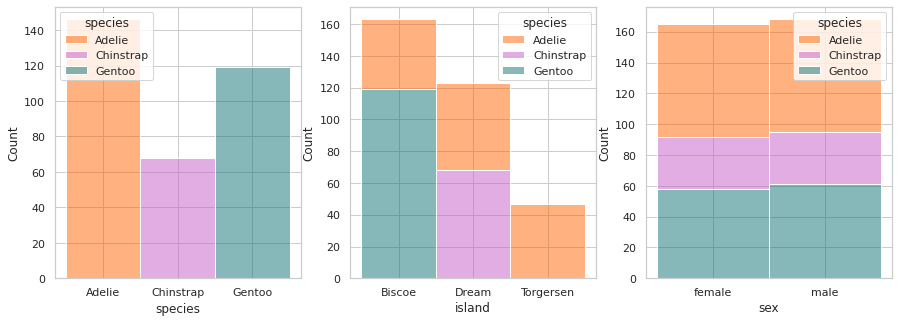

In [12]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i in range(len(columns)):
   sns.histplot(
        ax=ax[i],
        data=penguins_df,
        x=columns[i],
        hue='species',
        multiple='stack',
        palette=penguin_color,
        alpha=0.5,
    )

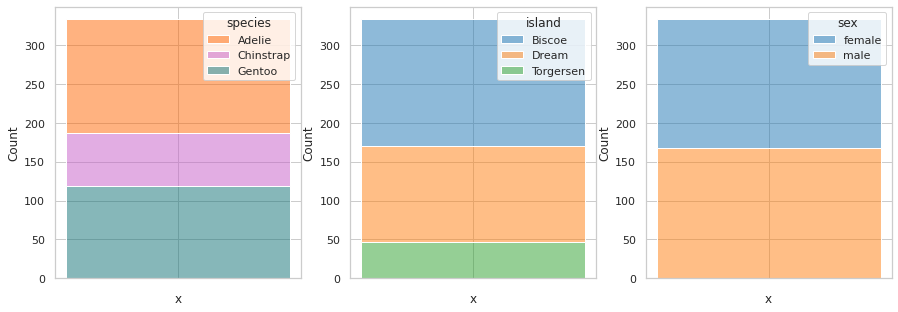

In [13]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

for i in range(len(columns)):
   sns.histplot(
        ax=ax[i],
        data=penguins_df.add_column('x','').reset_index(),
        x='x',
        multiple='stack',
        hue=columns[i],
        palette=penguin_color if columns[i] == 'species' else None,
        alpha=0.5
    )

# Medidas de tendencia central

In [14]:
penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [15]:
penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [16]:
penguins_df.describe(include='category')


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [17]:
species = penguins_df.species.unique()

adelie_df = penguins_df.query("species == 'Adelie'")
gentoo_df = penguins_df.query("species == 'Gentoo'")
chinstrap_df = penguins_df.query("species == 'Chinstrap'")

specie = [adelie_df,gentoo_df,chinstrap_df]
numeric_columns = penguins_df.select_dtypes(include=np.number).columns


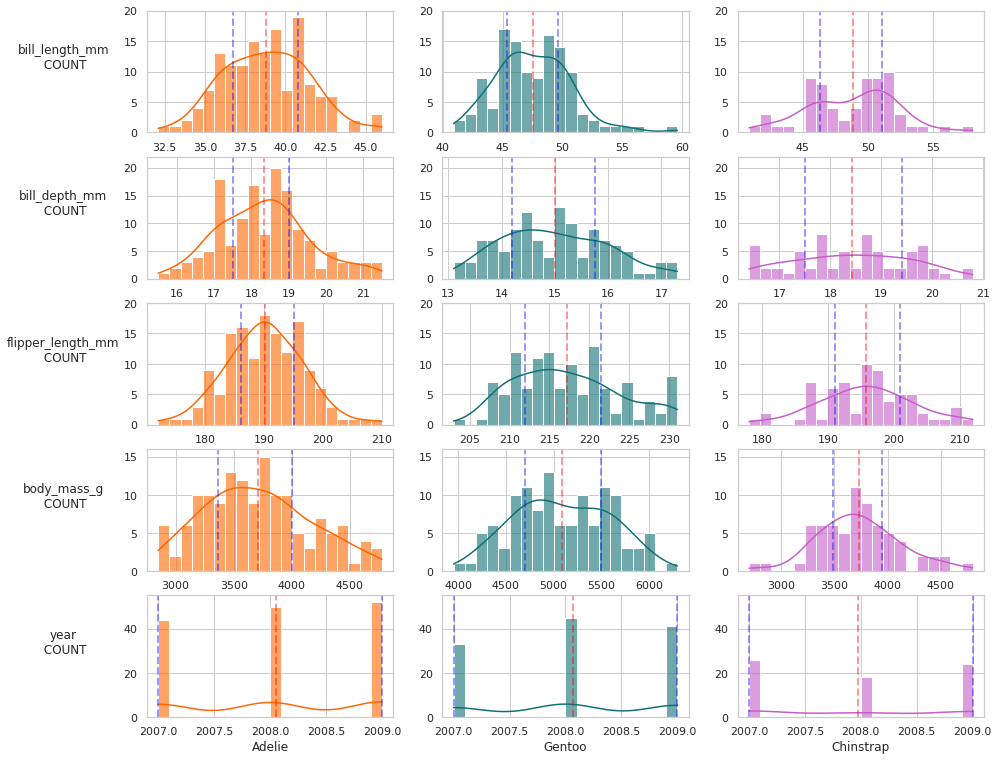

In [18]:
fig,ax = plt.subplots(len(numeric_columns),len(specie), figsize=(15,13))
bins = 20
for i in range(len(numeric_columns)):
    for j in range(len(specie)):
        sns.histplot( 
            ax=ax[i][j],
            data=specie[j],
            x=numeric_columns[i],
            multiple='layer', # {“layer”, “dodge”, “stack”, “fill”}
            stat='count',
            hue='species',
            bins=bins,
            kde=True,
            palette=penguin_color,
            alpha=.6
            )
        
        ax[i][j].axvline(
            x=specie[j][numeric_columns[i]].mean(),
            color='red',
            linestyle='dashed',
            linewidth=2,
            alpha=0.4
        )
        ax[i][j].axvline(
            x=specie[j][numeric_columns[i]].quantile(.25),
            color='blue',
            linestyle='dashed',
            linewidth=2,
            alpha=0.4
        )
        ax[i][j].axvline(
            x=specie[j][numeric_columns[i]].quantile(.75),
            color='blue',
            linestyle='dashed',
            linewidth=2,
            alpha=0.4
        )

        ax[0][0].set_ylim(0,20) ,ax[0][1].set_ylim(0,20) ,ax[0][2].set_ylim(0,20)
        ax[1][0].set_ylim(0,22), ax[1][1].set_ylim(0,22), ax[1][2].set_ylim(0,22)
        ax[2][0].set_ylim(0,20), ax[2][1].set_ylim(0,20), ax[2][2].set_ylim(0,20)
        ax[3][0].set_ylim(0,16), ax[3][1].set_ylim(0,16), ax[3][2].set_ylim(0,16)
        ax[4][0].set_ylim(0,55), ax[4][1].set_ylim(0,55), ax[4][2].set_ylim(0,55)

        ax[i][j].set_ylabel(f'{numeric_columns[i]}\n COUNT', labelpad=60,rotation=0) if j==0 else ax[i][j].set_ylabel('')
            
        ax[i][j].set_xlabel(f'{species[j]}')
        ax[i][j].get_legend().remove()

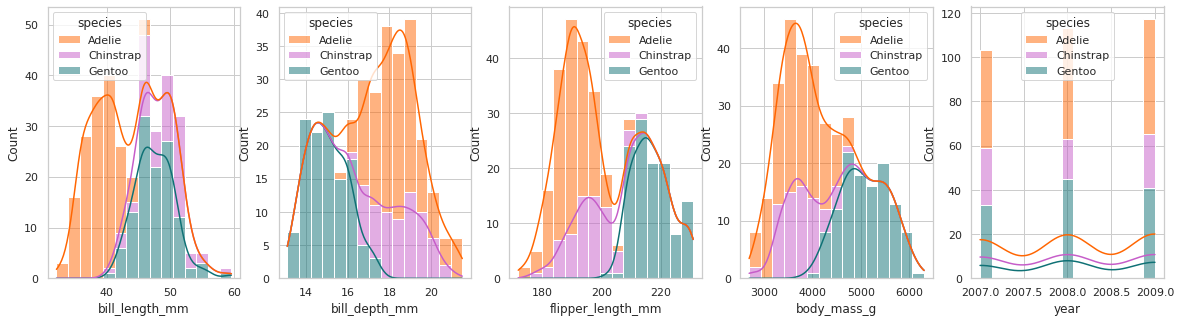

In [19]:
fig,ax = plt.subplots(1,len(numeric_columns), figsize=(20,5))

for i in range(len(numeric_columns)):
    sns.histplot( 
        ax=ax[i],
        data=penguins_df,
        x=numeric_columns[i],
        multiple='stack',
        hue='species',
        bins=15,
        palette=penguin_color,
        kde=True,
        )

## PMF Probability Mass Function

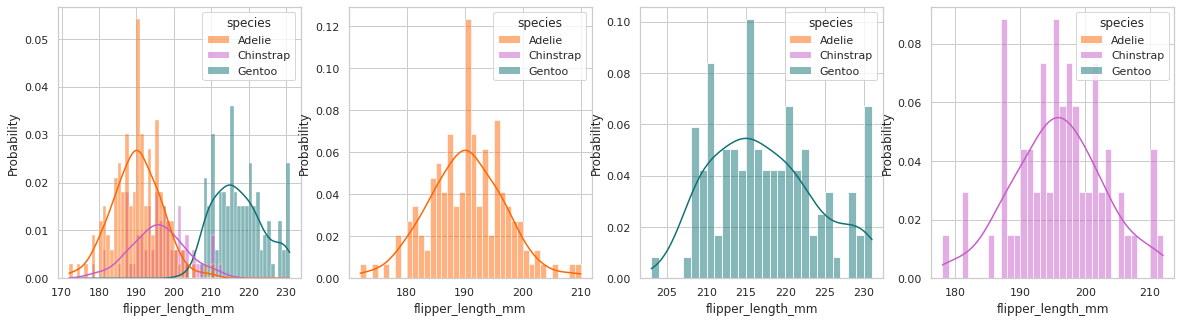

In [20]:
fig,ax = plt.subplots(ncols=4,nrows=1,figsize=(20,5))

for i in range(len(specie) + 1):
    sns.histplot(
        ax = ax[i],
        data=penguins_df if i == 0 else specie[i-1],
        x='flipper_length_mm',
        binwidth=1,
        stat='probability',
        hue='species',
        palette=penguin_color,
        kde=True
    );

In [21]:
# Top 5 medidas mas probables del largo en mm de ala por especie
a = pd.DataFrame([])

for i in range(len(specie)):
    a[species[i]] = ( empiricaldist.Pmf.from_seq(specie[i].flipper_length_mm,normalize=True))

print(f'''
{(a.Chinstrap.sort_values(ascending=False).dropna().head()*100).round(2)}

{(a.Adelie.sort_values(ascending=False).dropna().head()*100).round(2)}

{(a.Gentoo.sort_values(ascending=False).dropna().head()*100).round(2)}
''')


195.0    8.82
187.0    8.82
193.0    7.35
201.0    7.35
197.0    7.35
Name: Chinstrap, dtype: float64

190.0    12.33
195.0     7.53
191.0     6.85
187.0     6.85
193.0     6.16
Name: Adelie, dtype: float64

210.0    8.40
208.0    5.88
203.0    0.84
Name: Gentoo, dtype: float64



# ECDF Empirical Cumulative Distribution Function

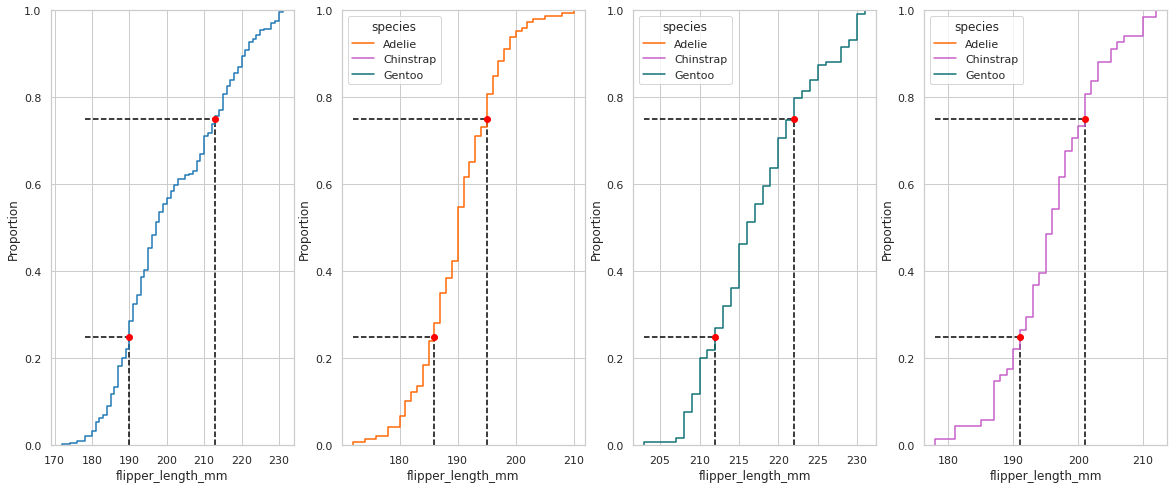

In [22]:
# Grafico ECDF con sus rangos intercuartilicos
fig,ax = plt.subplots(1,4,figsize=(20,8))

p_1 = 0.25 # specifi probability
p_2 = 0.75
ps = (p_1, p_2) # IQR

for i in range(len(species)+1):
    sns.ecdfplot(
    ax = ax[i],
    data=penguins_df if i == 0 else specie[i-1],
    x='flipper_length_mm',
    hue='species' if i !=0 else None,
    palette=penguin_color
    )
    
    qs = empiricaldist.Cdf.from_seq(penguins_df.flipper_length_mm if i ==0 else specie[i-1].flipper_length_mm,normalize=True).inverse(ps)

    # if i == 0:
        # pass
    # else:
    ax[i].vlines(
        x=qs,
        ymin=0,
        ymax=ps,
        linestyles='--',color='black',
    )
    ax[i].hlines(
        y=ps,
        xmin=empiricaldist.Cdf.from_seq(specie[i-1].flipper_length_mm,normalize=True).qs[0],
        xmax=qs,
        linestyles='--',color='black',
    )
    ax[i].plot(qs,ps,'ro') # puntos de interseccion




In [23]:
# Top 5 medidas mas probables del largo en mm de ala por especie
# a = pd.DataFrame([], index=range(int(penguins_df.flipper_length_mm.min()),int(penguins_df.flipper_length_mm.max())))

# for i in range(len(specie)):
#     a[species[i]] = empiricaldist.Cdf.from_seq(specie[i].flipper_length_mm,normalize=True)

# for i in range(len(a.columns)):
#     display(a[species[i]].sort_values(ascending=False).head())

### CDF teorico comaprado al CDF empirico

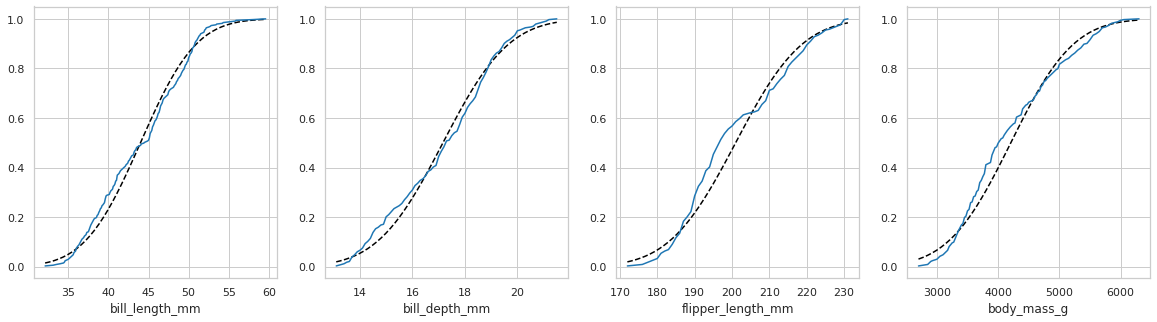

In [24]:
fig,ax = plt.subplots(1,len(numeric_columns)-1, figsize=(20,5))

for i in range(len(numeric_columns)-1):
    stats = penguins_df[numeric_columns[i]].describe()

    xs = np.linspace(stats['min'],stats['max']) 
    ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

    ax[i].plot(xs,ys, color='black', linestyle='--')

    #grafica de la distribucion de los datos reales
    ax[i].plot(empiricaldist.Cdf.from_seq(
        penguins_df[numeric_columns[i]],
        normalize=True
    ))
    ax[i].set_xlabel(numeric_columns[i])


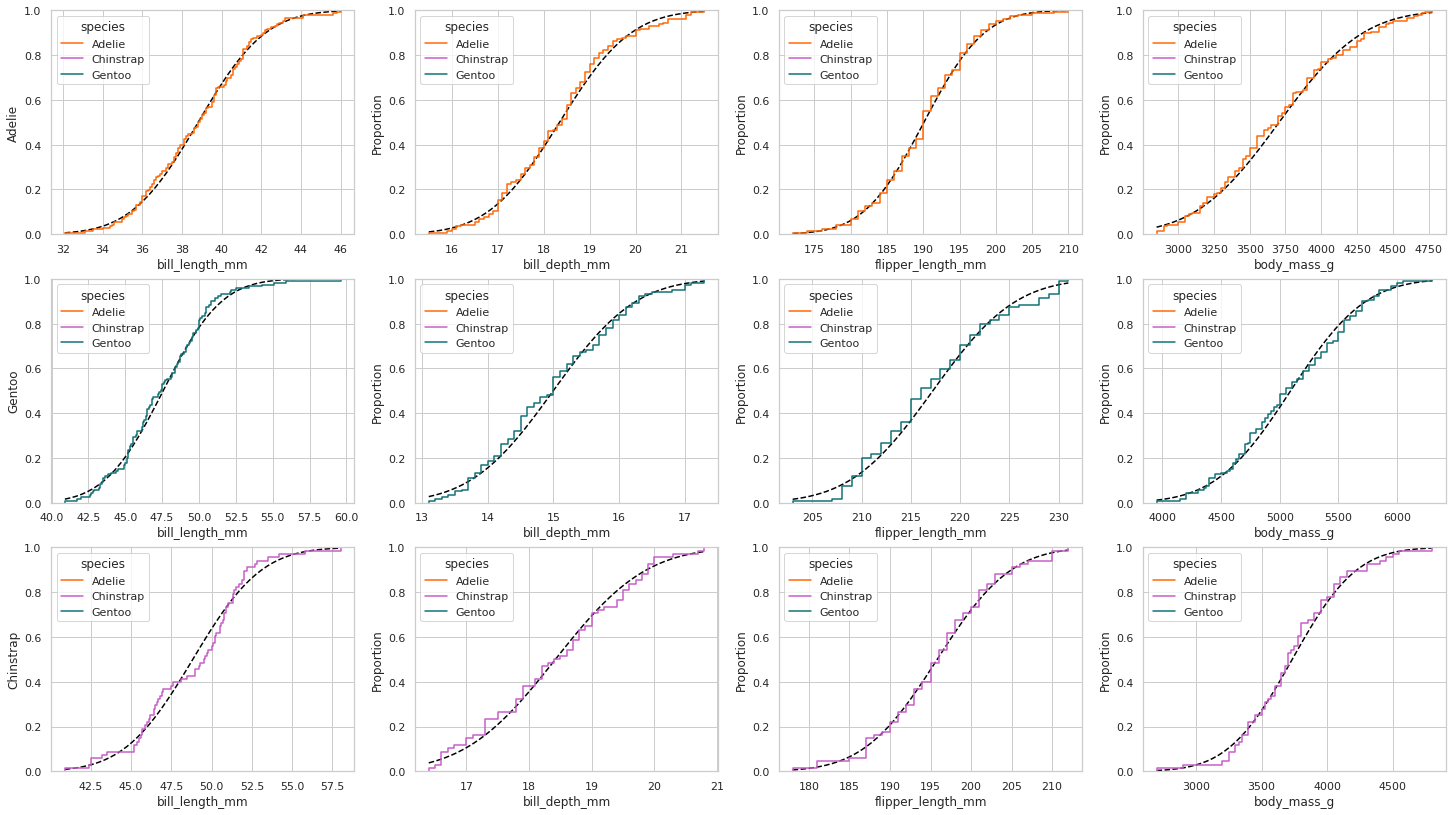

In [25]:
fig,ax = plt.subplots(len(specie),len(numeric_columns)-1, figsize=(25,14))

for i in range(len(specie)):
    for j in range(len(numeric_columns)-1):
        stats = specie[i][numeric_columns[j]].describe()

        xs = np.linspace(stats['min'],stats['max']) 
        ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

        ax[i][j].plot(xs,ys, color='black',linestyle='--')

        sns.ecdfplot(
            ax = ax[i][j],
            data = specie[i],
            x=numeric_columns[j],
            hue='species',
            palette=penguin_color,
        ) 


        ax[i][0].set_ylabel(species[i])
            
        ax[2][j].set_xlabel(numeric_columns[j])
        # ax[i][j].get_legend().remove()

## PDF Probability density function

### PMF teorica comparado al  PMF empirico

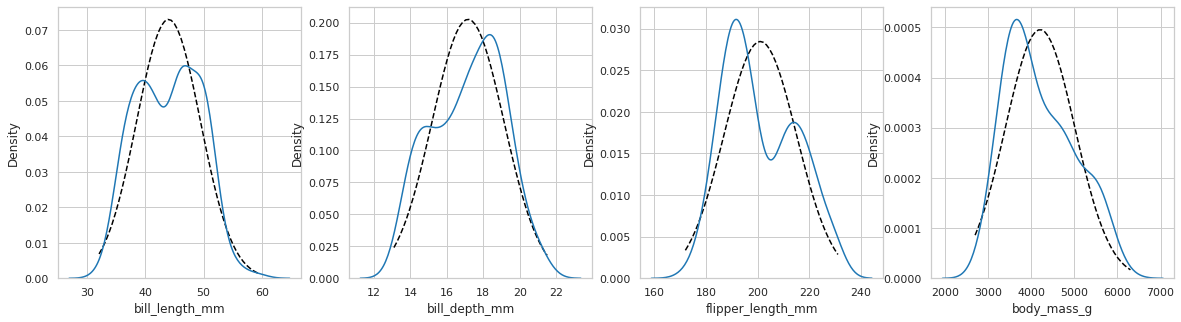

In [26]:
fig,ax = plt.subplots(1,len(numeric_columns)-1, figsize=(20,5))

for i in range(len(numeric_columns)-1):
    stats = penguins_df[numeric_columns[i]].describe()

    xs = np.linspace(stats['min'],stats['max']) 
    ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

    ax[i].plot(xs,ys, color='black',linestyle='--')

    # grafica de la distribucion de los datos reales
    sns.kdeplot(
        ax = ax[i],
        data = penguins_df,
        x=numeric_columns[i],
    ) 

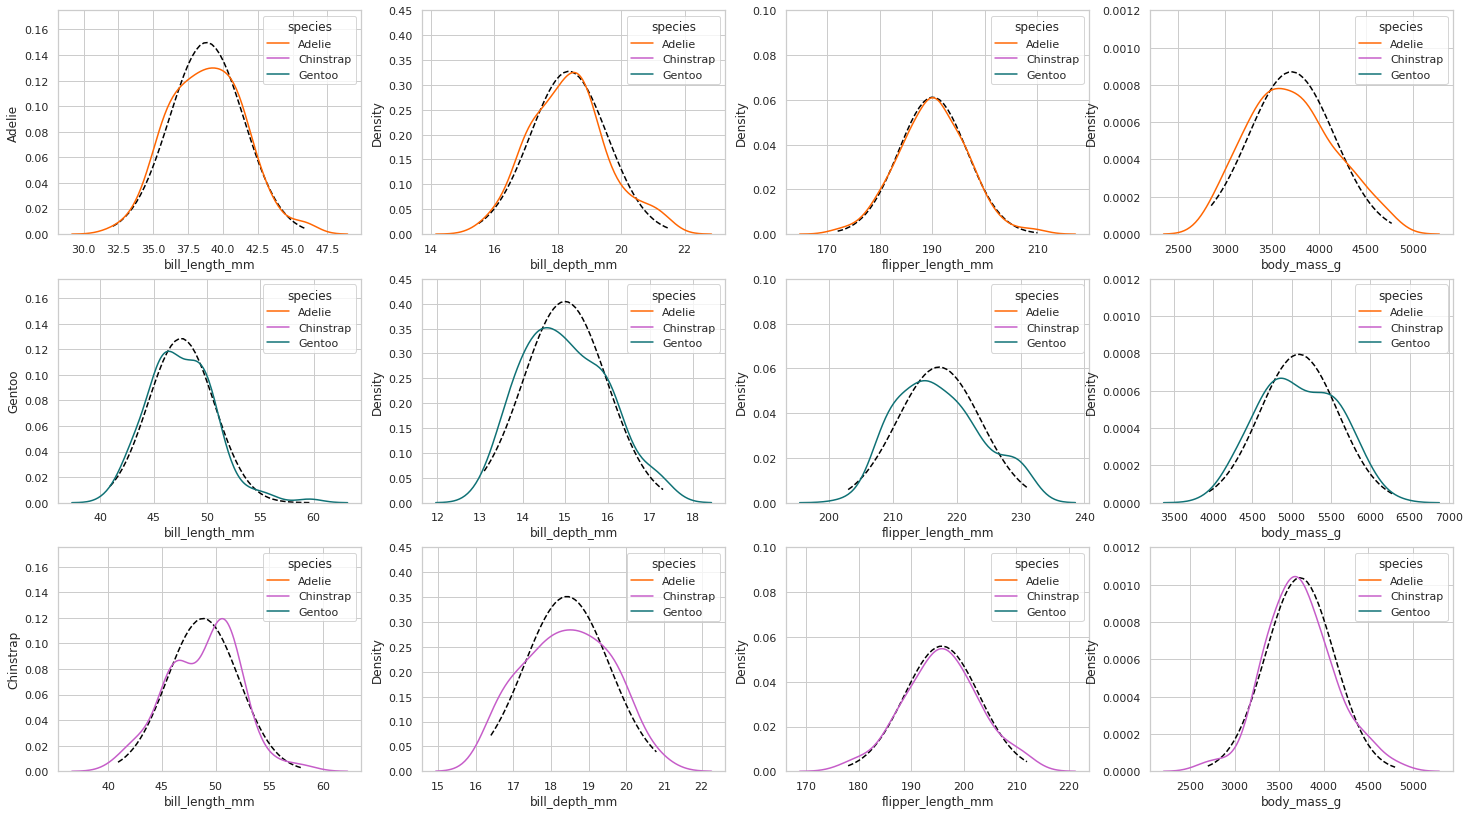

In [27]:
fig,ax = plt.subplots(len(specie),len(numeric_columns)-1, figsize=(25,14))

for i in range(len(specie)):
    for j in range(len(numeric_columns)-1):
        stats = specie[i][numeric_columns[j]].describe()

        xs = np.linspace(stats['min'],stats['max']) 
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs,ys, color='black',linestyle='--')

        sns.kdeplot(
            ax = ax[i][j],
            data = specie[i],
            x=numeric_columns[j],
            hue='species',
            palette=penguin_color
        ) 


        ax[0][0].set_ylim(0,.175) ,ax[0][1].set_ylim(0,.45) ,ax[0][2].set_ylim(0,.1),ax[0][3].set_ylim(0,.0012)
        ax[1][0].set_ylim(0,.175), ax[1][1].set_ylim(0,.45), ax[1][2].set_ylim(0,.1),ax[1][3].set_ylim(0,.0012)
        ax[2][0].set_ylim(0,.175), ax[2][1].set_ylim(0,.45), ax[2][2].set_ylim(0,.1),ax[2][3].set_ylim(0,.0012)

        ax[i][0].set_ylabel(species[i])
            
        ax[2][j].set_xlabel(numeric_columns[j])
        # ax[i][j].get_legend().remove()

## Analisis Bivariado

### Estimacion de densidad por especie de pinguinos entre las variables:

- Masa corporal en gramos
- Largo de ala

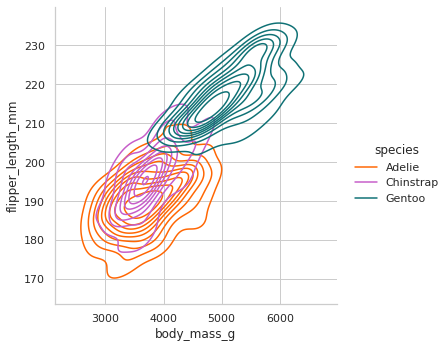

In [28]:
sns.displot(
    data=penguins_df,
    x='body_mass_g',
    y='flipper_length_mm',
    kind='kde',
    hue='species',
    palette=penguin_color
);

- Los pinguinos de la especie Gentoo tienen una mayor masa corporal y longitud. 
- Por lo cual prodiamos inferir que la longitud del ala depende de la masa del pinguno.

Estimacion de densidad de las mismas variables por islas:

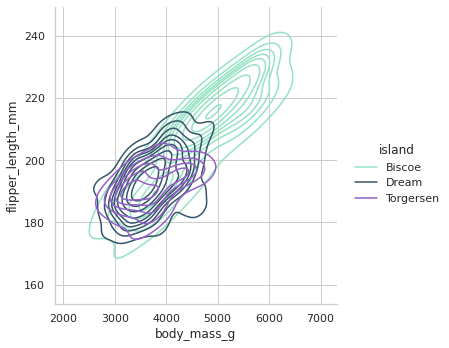

In [29]:
sns.displot(
    data=penguins_df,
    x='body_mass_g',
    y='flipper_length_mm',
    kind='kde',
    hue='island',
    palette=penguin_color
);

- En la isla Biscoe viendo la densidad y conociendo la longitud de ala por especie, podríamos decir que hay una mayor cantidad de especies de pingüinos que en las otras dos.

Comprobaremos esto haciendo un histplot:

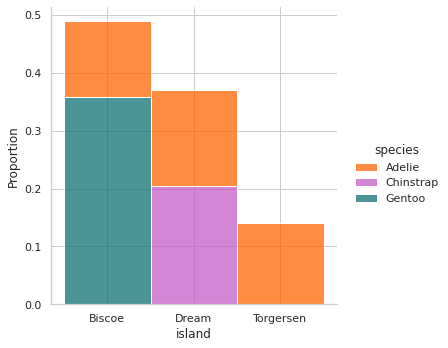

In [30]:
sns.displot(
    data=penguins_df,
    x='island',
    multiple='stack',
    kind='hist',
    hue='species',
    stat='proportion',
    palette=penguin_color
);

- Tiene mayor proporcion de pinguinos y dos de cada especies. Sin embargo la isla Dream tambien.
- Al parecer la isla Torgensen es la unica que consta de una especie unica de pinguino.

### Relacion entre peso de los pinguinos por islas

Variables a analizar:

- Especies
- Masa corporal en gramos

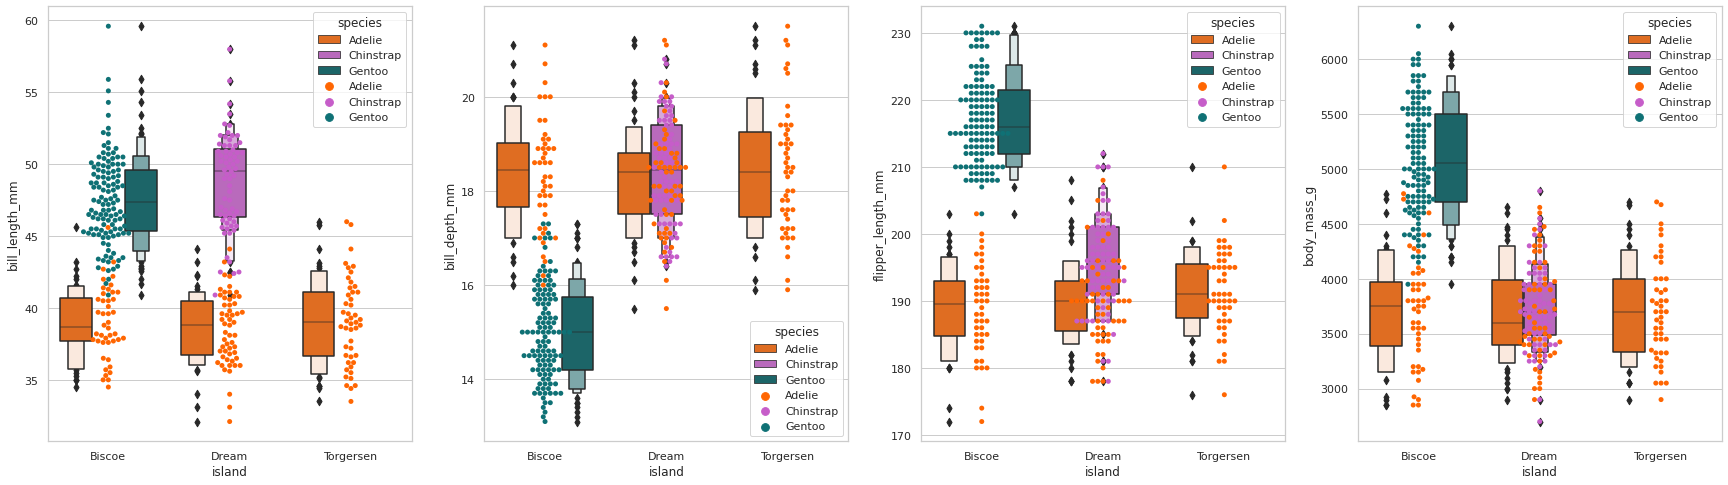

In [159]:
fig,ax = plt.subplots(1,4,figsize=(30,8))
#grafico 1
for i in range(len(numeric_columns)-1):
    sns.swarmplot(
        ax=ax[i],
        data=penguins_df,
        x='island',
        y=numeric_columns[i],
        hue='species',
        palette=penguin_color,
    )
    sns.boxenplot(
        ax=ax[i],
        data=penguins_df,
        x='island',
        y=numeric_columns[i],
        hue='species',
        palette=penguin_color,
    )

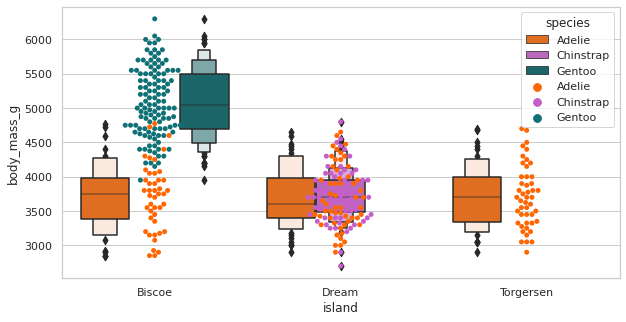

In [31]:
plt.figure(figsize=(10,5))
#grafico 1
sns.swarmplot(
    data=penguins_df,
    x='island',
    y='body_mass_g',
    hue='species',
    palette=penguin_color,
)
sns.boxenplot(
    data=penguins_df,
    x='island',
    y='body_mass_g',
    hue='species',
    palette=penguin_color,
)

plt.show()

- **Isla Biscoe:**
    - En la isla Biscoe se encuentran los pingüinos Gentoo y Adelie
    - Se registraron **pingüinos 119 de la especie Gentoo**, son los mas pesados dentro de las tres especies con una media de 5050 gr y pesos máximos de 6300 gr. 
    - Se registraron **pingüinos 44 de la especie Adelie**, se destacan por su peso promedio de 3750 gr que es ligeramente superior en comparación a su misma especie en las 2 otras islas.
    - La isla Biscoe consta del mayor registro de pinguinos (163), destaca por tener los pinguinos con peso promedio mas alto.
    ________
- **Isla Dream:**
    - En la isla Dream se encuentran los pinguinos Chinstrap y Adelie
    - Se registraron **pingüinos 68 de la especie Chinstrap** sobrepasa su peso promedio (3700 g) y primer cuartil (3487) en comparación a los Adelie. Su distribución es la que más se asemeja a una distribución normal.
    - Se registraron **pingüinos 55 de la especie Adelie** presentan un peso promedio (3600 g) y peso máximo (4650 g) inferior a su misma especie en las 2 otras islas. 
    - La isla Dream consta 123 registros de pingüinos.
    ________
- **Isla Torgersen:**
    - En la isla Torgersen se encuentran solo los pingüinos Adelie
    - Se registraron **pingüinos 47 de la especie Adelie** presentan la distribución mas semejante a una normal en comparación de las otras especies y de su misma especie en las otras islas. 


- La especie Adelie no tiene cambios significativos en su masa.

- la correlacion negativa que obtuvimos del analisis en conjunto de los pinguinos, surgen en la especie Adelie que habita la isla Biscoe.
- La especie Adelie de las islas Biscoe presentan correlaciones positivas fuertes que son semejantes a las que vimos en otras especies, en variables que su misma especie no presenta correlaciones tan altas.
- La especie Adelie de las islas Biscoe presenta correlaciones negativas altas en la variable **bill_depth_mm**, lo cual es contrario a sus vecinos de la misma especie
    - Suponemos que este factor genero la correlacion negativa en el analisis en conjunto de los pinguinos

In [53]:
# Estadisticos
for i in range(len(species)):
            display((
                 specie[i]
                .groupby(['island','species'])
                .body_mass_g
                .describe()
                .dropna()
                ))

,,count,mean,std,min,25%,50%,75%,max
island,species,,,,,,,,
Biscoe,Adelie,44.0,3709.659091,487.733722,2850.0,3387.5,3750.0,3975.0,4775.0
Dream,Adelie,55.0,3701.363636,448.774519,2900.0,3400.0,3600.0,3987.5,4650.0
Torgersen,Adelie,47.0,3708.510638,451.846351,2900.0,3337.5,3700.0,4000.0,4700.0


,,count,mean,std,min,25%,50%,75%,max
island,species,,,,,,,,
Biscoe,Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


,,count,mean,std,min,25%,50%,75%,max
island,species,,,,,,,,
Dream,Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0


### Correlacion entre variables

In [33]:
# Copiamos el dataset para no modificar el original
df2 = penguins_df.copy()

In [34]:
# Convertimos valores de la variable sex
df2 = (df2.assign(numeric_sex = lambda df: df.sex.replace(['male','female'],[1,0])))


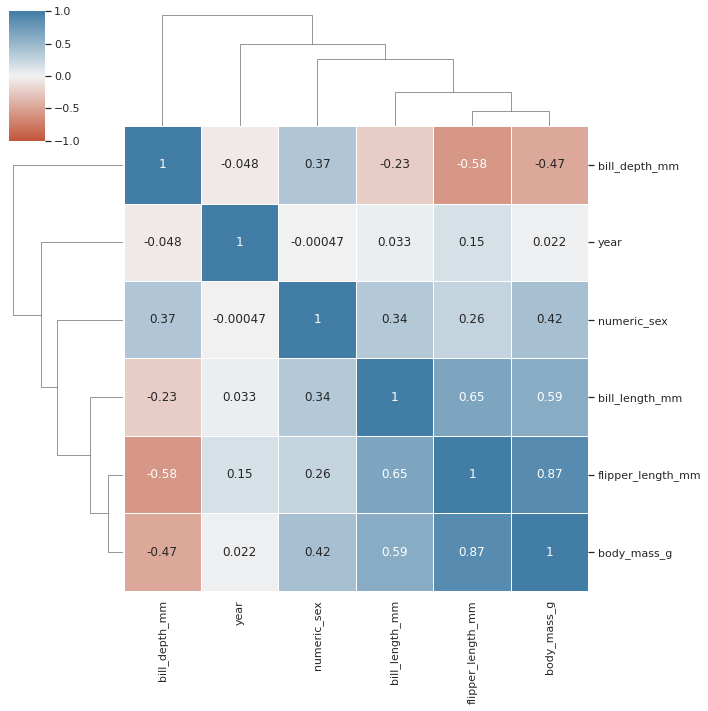

In [35]:
# Graficamos
sns.clustermap(
    data=df2.corr(),
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidth=.5,
    annot=True,
)

Podemos concluir que la correlacion de las variables predomina la correlaciones positivas entre las variables, exceptuando por la variable **bill_depth_mm** que aparenta ser en su totalidad negativa.

Cabe destacar que existe entre las correlaciones negativas y positivas, hay una considerable cantidad que se acercan al $0$ para representar correlacion casi nula.



### Comprobemos la correlacion separando los datos por especies

Teniendo en cuenta el análisis anterior que realizamos sobre las correlaciones de las variables

Nos enfocaremos en la correlación negativa que surge entre las variables **bill_length_mm** y **bill_depth_mm**.

Si graficamos las variables en un diagrama de dispersión, nos encontramos con una dispersión que aparenta una tendencia a una correlación inexistente.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

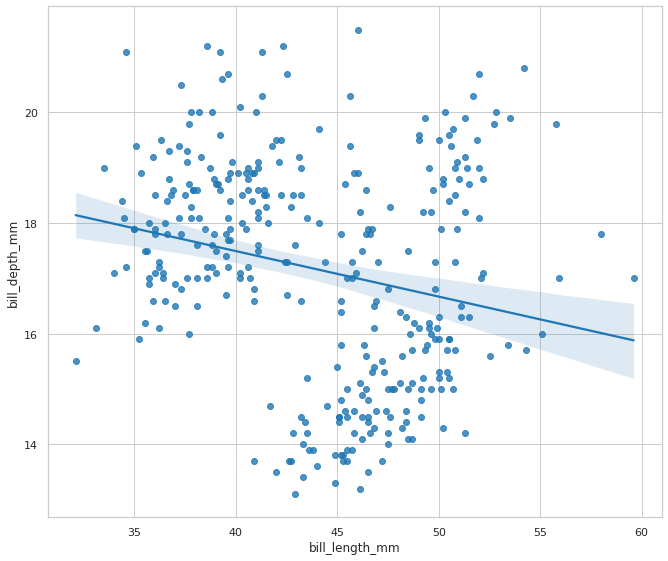

In [193]:
sns.regplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

Teniendo en cuenta que estamos frente a un gráfico donde se presentan 3 variables categóricas que no fueron clasificadas (sexo del pingüino, especie e isla donde habita), analizaremos el gráfico clasificando los pingüinos por especie

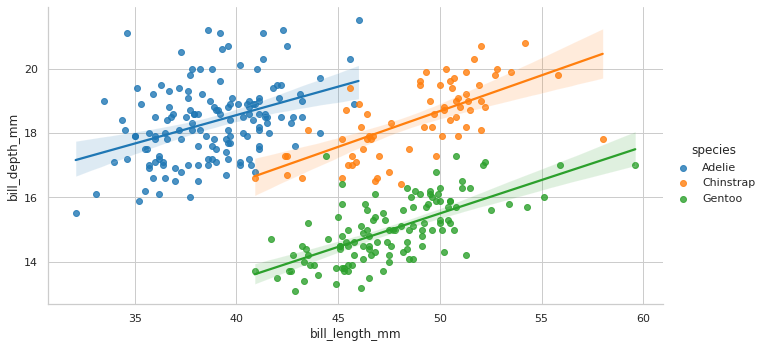

In [197]:
sns.lmplot(
    data=penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    aspect=1.9
)

Clasificadas las variables podemos analizar que si existe correlación alguna que aparenta ser de tipo lineal entre las variables **bill_length_mm** y **bill_depth_mm**.

Vista la nueva evidencia volveremos a analizar los índices de correlaciones de cada especie.

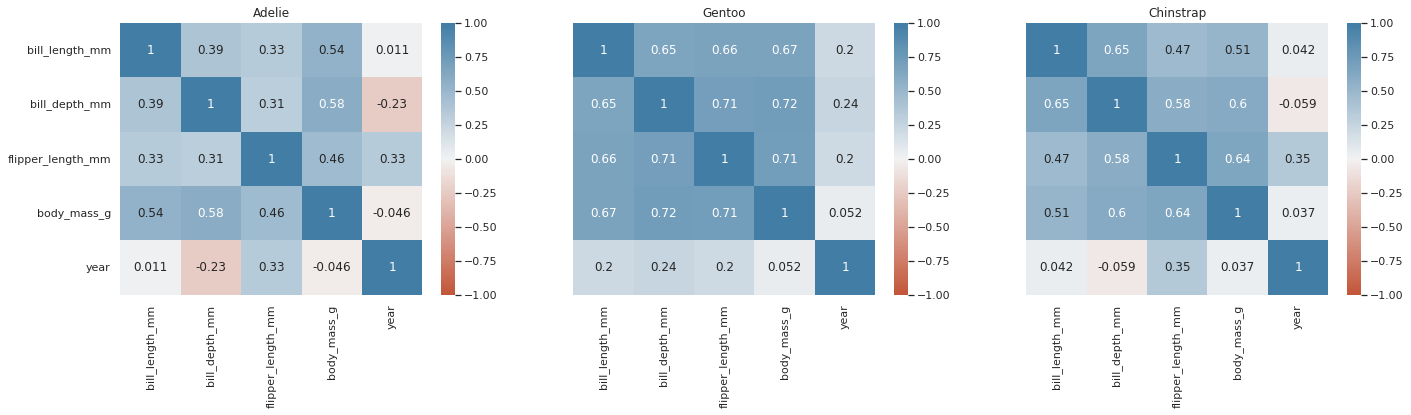

In [39]:
fig,ax = plt.subplots(1,3,sharey=True,sharex=True,figsize=(23,5))
for i in range(3):
    sns.heatmap(
        ax= ax[i],
        data=specie[i].corr(),
        annot=True,
        cmap=sns.diverging_palette(20,238, as_cmap=True),
        vmin=-1,
        vmax=1,
    )
    ax[i].set_title(species[i])


Vista la nueva gráfica vemos un cambio notable en las correlaciones entre las variables, quedando en su mayoría correlaciones positivas y destacando de todas el año, que en las tres especies aparenta ser una correlación nula

Las variables que anteriormente mencionamos **bill_length_mm** y **bill_depth_mm**, ahora tienen una correlación positiva alta tanto en las especies **Gentoo** y **Chinstrap**, pero destaca la especie **Adelie** que tiene una correlación un poco menor que las otras especies

Pasaremos a analizar más a fondo la especie Adelie, ya que no parece seguir el patron normal que tienen las otras especies. El análisis de correlaciones se enfocará en la especie Adelie clasificandoslo por isla.

Ahora podemos ver mejor la correlacion de las variables separadas por especies. 

- Destacamos que analizando el indice de correlacion por especie predomino la correlacion positiva, se disminuyo la correlacion negativa y resalto la correlacion nula dada por la variable **year**
- La variable variables **body_mass_g** tiene el mayor indice de correlacion positiva con otras variables.
- La variable **flipper_length_mm** es la segunda variable con mayor indice de correlacion positiva en las tres especies.
- La variable **year** presenta una correlacion casi nula en todas las especies (Podriamos plantearnos ignorarlas para modelos y estudios posteriores)
- La especie **Adelie** presenta correlaciones debiles en sus variables **bill_depth, bill_length y flipper_length** en comparacion a las otras dos especies, podemos tratar de descubrir el porque **analizamos la especie por islas.**

In [199]:
# Separamos la especie Adelie por isla
adelie_habitad = adelie_df.island.unique()

torgersen_adelie_df = penguins_df.query("island == 'Torgersen'")
biscoe_adelie_df = penguins_df.query("island == 'Biscoe'")
dream_adelierap_df = penguins_df.query("island == 'Dream'")

adelie_island = [dream_adelierap_df,biscoe_adelie_df,torgersen_adelie_df]

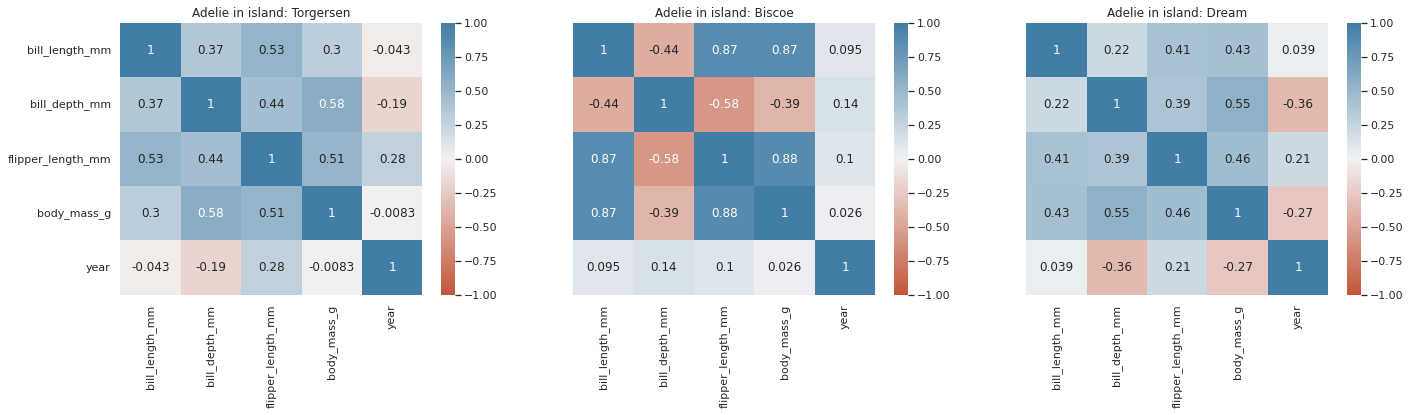

In [191]:
fig,ax = plt.subplots(1,3,sharey=True,sharex=True,figsize=(23,5))
for i in range(3):
    sns.heatmap(
        ax= ax[i],
        data=adelie_island[i].corr(),
        annot=True,
        cmap=sns.diverging_palette(20,238, as_cmap=True),
        vmin=-1,
        vmax=1,
    )
    ax[i].set_title(f'Adelie in island: {adelie_habitad[i]}')


Comparando los Adelie que habitan la isla Torgersen y Dream podemos ver que tienen una correlación similar entre sus variables

Pero destacan los Adelie en la isla Biscoe que presentan una correlación positiva fuerte entre la variable **bill_length_mm** y las demás variables, pero una correlación negativa sobre la combinación de la variable **bill_depth_mm**

**Concluimos que:**

- la correlación negativa que obtuvimos del análisis en conjunto de los pingüinos, surgen en la especie Adelie que habita la isla Biscoe.

- La especie Adelie de las islas Biscoe presentan correlaciones positivas fuertes que son semejantes a las que vimos en otras especies, en variables que su misma especie no presenta correlaciones tan altas.

- La especie Adelie de las islas Biscoe presenta correlaciones negativas altas en la variable bill_depth_mm, lo cual es contrario a sus vecinos de la misma especie
Suponemos que este factor género la correlación negativa en el análisis en conjunto de los pingüinos

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


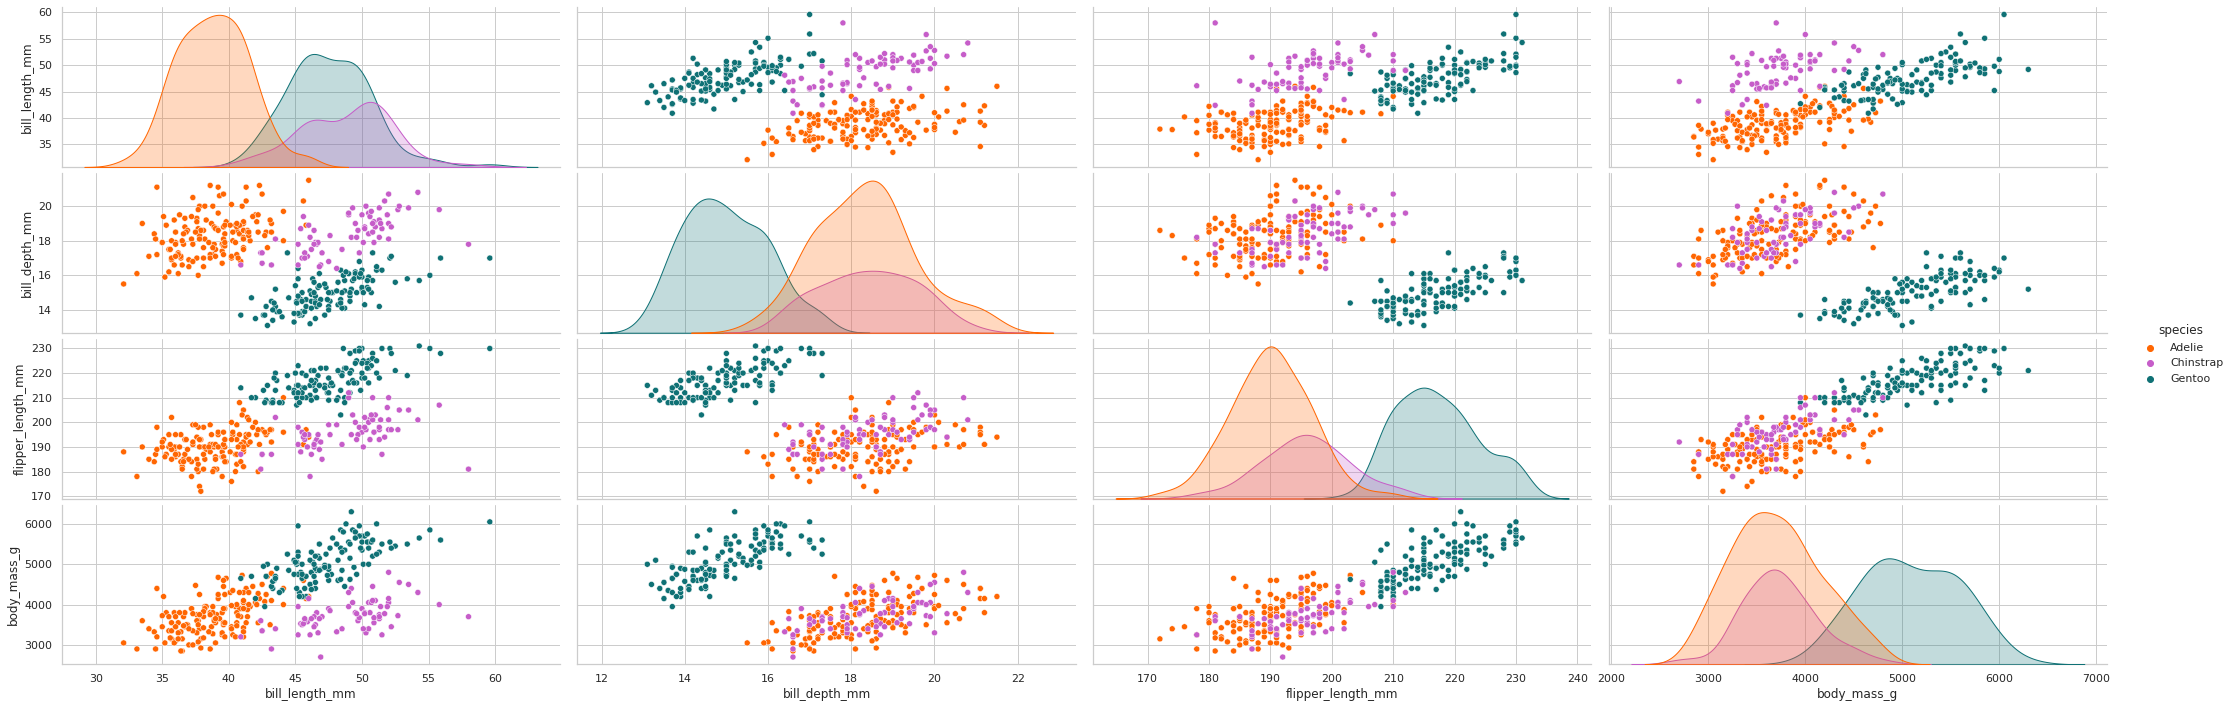

In [275]:
sns.pairplot(
    data=penguins_df.iloc[:,:7],
    hue='species',
    palette=penguin_color,
    aspect=3,
 )

In [221]:
for i in range(len(numeric_columns)):
    print(numeric_columns[::-1][i])

year
body_mass_g
flipper_length_mm
bill_depth_mm
bill_length_mm
